# Solving the Diffusion Equation numerically. 



* To study the method of lines with forward and backward Euler for the heat equation.
* To examine the convergence and stability properties of these methods.

## Forward Euler method for the diffusion equation

Consider the partial differential equation
$$
  u_t = D\, u_{xx} \quad \textrm{ for } x \in \left( 0, 1 \right), \quad t \in \left( 0, T \right),
$$
subject to an initial condition
$$
  u \left( x, t = 0 \right) = I(x),
$$
and homogeneous Dirichlet boundary conditions
$$
  u \left( x = 0, t \right) = b_0 = 0.0,  \quad u \left( x = 1, t \right) = b_L = 1.0,
$$
where $D$ is a diffusion coefficient (taken to be 1 in the following) and $I$ is an inital function of $x$ at time $t$.

In this equation, you can view $u$ as temperature which is changing in time and space. 

Applying the method of lines, and discretising over the $t$-dimension with a forward Euler discretisation, for $D=1$, leads to
$$
  \frac{U_m^{n + 1} - U_m^n}{\Delta t} = \frac{U_{m - 1}^n - 2 U_m^n + U_{m + 1}^n}{(\Delta x)^2} \quad \textrm{ for } m \in \left\{ 1, \ldots, M - 1 \right\}, n \in \left\{ 0, \ldots, N - 1 \right\},
$$
with
$$
    U_m^0  = I(x) \quad \textrm{ for } m \in \left\{ 1, \ldots, M - 1 \right\}, \\
    U_0^n  = b_0 , U_M^n = b_L \quad \textrm{ for } n \in \left\{ 0, \ldots, N \right\},
$$
where $U_m^n$ is the fully discrete approximation for
$U \left( x = x_m = m \Delta x, t = t_n = n \Delta t \right)$, with
$\Delta x = 1/M$, $\Delta t = T / N$ for some positive integers $M$, $N$.

First try solving for $I(x) = \sin (\pi x), b_0 =0, b_L =0 $. This has solution $e^{-\pi^2 t}\sin (\pi x)$.

Then you could try $I(x) = 2.0$, $b_0 = 0$, and $b_L = 1.0$ from Q5 of Worksheet 1 which has a more complicated solution. (We suggest you sum up to 2000 terms from the analytical solution in this case for the 'exact' solution.)

🚩 **Using the script below, complete this discretisation of the initial boundary value problem. Run your code for $N = 30,000$, $T = 1.0$, and $M =100 $. Discuss what is happening to temperature distribution and the causes of any differences between the analytic and numerical solutions.**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation
%matplotlib inline

In [7]:
# Initial condition and exact solution for the simple case
# b0 = 0.0  # u(0,t)= b0
# bL = 0.0  # u(L,t)= bL

# def I(x): # initial u(x,0)
#     i_x = np.zeros(np.size(x))
#     i_x = np.sin(np.pi*x) 
#     return i_x

# def U_exact(x,t):
#     u_exsin = np.exp(-np.pi**2 *t)* np.sin(np.pi*x)
#     return u_exsin

In [2]:
# Initial condition and exact solution of the diffusion equation at time t for an array of x 
# values (see Q5 on worksheet),
# Remember I(x) = 2.0

b0 = 0.0  # u(0,t)= b0
bL = 1.0  # u(L,t)= bL

#  function for setting initial conditions in space
def I(x): # initial u(x,0)
    len_x = np.size(x)
    i_x = 2.0 *np.ones(len_x) # the more complicated case
    return i_x

def U_exact(x,t):
    M = np.size(x)
    u_ex = np.zeros(M)  
    u_ex[0] = b0   # b0 is dirichlet boundary condition at u(0,t)
    for n in range(1,2000):  # use 2000 terms in the summation of the exact solution
        npi= n*np.pi
        if (n%2 == 0):
            c_n = (2.0)/(npi*(-1)**n)             
        else:
            c_n = (2.0)/(npi*(-1)**n)  + 8/npi                  
        u_ex = u_ex + c_n*np.sin(npi*x)*np.exp(-1*npi*npi*t)
        
    u_ex = u_ex + x  # add x for term in exact solution
    u_ex[-1] = bL # dirichlet boundary condition at u(L,t)
    return u_ex


In [5]:
def plotting(U,L):
    size_t = np.size(U,1)-1 # number of time steps
   
    fig, ax = plt.subplots(1, 1, figsize=(10, 8))
    markers =['X','.','+','o']

    colours = ['r','g','b','purple','yellow'] # make comparison easy
    colour_pos = 0;

    N_dots = 20
    x_dots = np.linspace(0, L, N_dots+1) # spatial points to plot exact solution at

    # some arbitarily chosen time points to compare at
    for plot_pos in [0, int(size_t/10),int(size_t/5), int(size_t/2), int(size_t)]:
    
    # exact solution
        U_tplot = U_exact(x_dots,t[plot_pos]) 
        label = "Exact, t=" + "%0.3f" % (t[plot_pos],)
        ax.plot(x_dots,U_tplot,linestyle = ':',color = colours[colour_pos],marker = markers[0], label=label)

    # numerical solution
        label = "Numerical, t=" + "%0.3f" % (t[plot_pos],)
        ax.plot(x,U[:,plot_pos],color = colours[colour_pos],ls='--', label=label)
        colour_pos = colour_pos + 1;
    
    plt.xlim(0,L) # zoom in on area of interest
    ax.legend() # turn on legend 
    plt.show()

In [3]:
# Set parameters

Nt_gaps = 20000    # number of timesteps
T = 1              # final time 
Nt_points = Nt_gaps + 1
t = np.linspace(0.,T,Nt_points)  # times at each time step

Nx_spaces = 100;   # number of spaces in x
L = 1; 
Nx_points = Nx_spaces + 1 
x = np.linspace(0, L, Nx_points)    # mesh points in space

dx = x[1] - x[0] 
dt = t[1] - t[0]

C = dt/(dx**2)
print("Delta x =", dx, "Delta t = ", dt, "C =", C)

# Initialize output

# Define the numerical solution 
# the first index is space and the second time
U = np.zeros((Nx_points,Nt_points))

# The initial condition
U[:,0]=I(x)

# enforce the boundary condition
U[0,0]  = b0 
U[-1,0] = bL

Delta x = 0.01 Delta t =  5e-05 C = 0.5


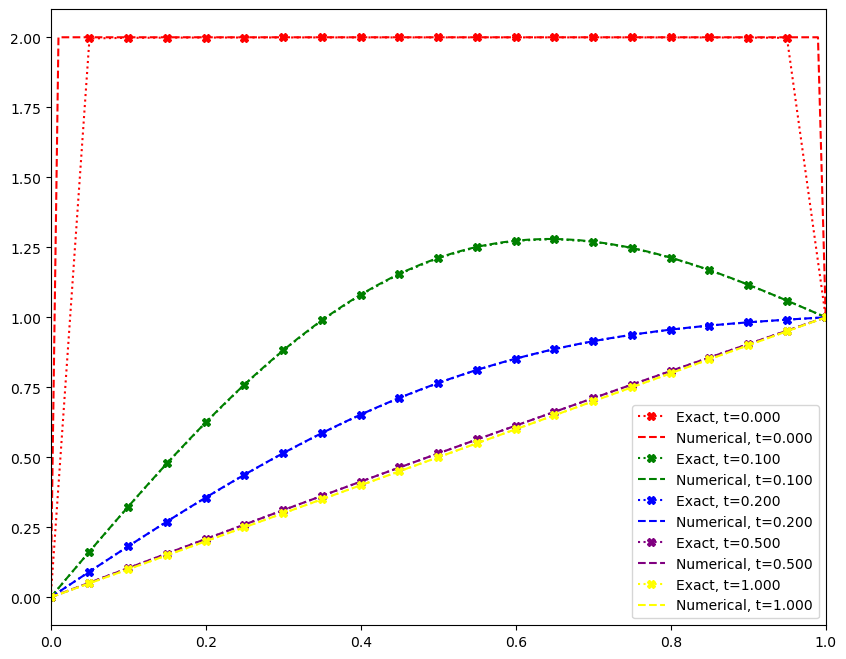

In [6]:
'''
 This script finds a numerical approximation for the solution to
 the following 1D heat equation:
   u_t = u_xx  for  x in (0,1),  t in (0,T),
   u(x,t=0) = I(x)
   u(x=0,t) = b_0;  u(x=1,t) = b_L,
 using a forward Euler scheme.
''' 
u_old = I(x)        # old/current values
u = np.zeros(Nx_points) # new values

for n in range(1, Nt_points):
    u[0]  = b0   # set Dirichlet boundary points
    u[-1] = bL

    # apply forward Euler on the internal points
    for i in range(1, Nx_points-1):
        u[i] = u_old[i] + C *(u_old[i-1] - 2*u_old[i] + u_old[i+1])
 
    # update u_old before next step
    u_old[:]= u
    # copy into full storage
    U[:,n] = u;

# plot snapshots of the solution
plotting(U, L)


You should see the exact solution match the numerical solution at all time steps for the two choices of initial condition. Note that the initial conditions may look different - why is this?

A common mistake in the answer to the question above is to use u[i] = u[i] + C *(u[i-1] - 2*u[i] + u[i+1]) -- in this way, the solution is integrated from u[i]=0 from the first time step, instead of the initial condition we presecribed for u_old. 

If one is interested in improving the efficiency of the code, one can get away with the varaibles u and u_old, and call the different columns of the matrix U directly. The code is strucutured in the current form for readability, not for numerical efficiency.

🚩**Run the script with different (positive) values of $\Delta t$. For which values of $\Delta t$ is the scheme stable?** 

(Hint: the condition required for stability is in the form $\Delta t / (\Delta x)^2 \leq C$, for some constant $C > 0$. What is the value of $C$?)

**Solution:** the scheme is stable provided $\Delta t / (\Delta x)^2 \leq 0.5$. To see that numerically, we can change parameters such as Nt_steps slightly. We can see that when $C$ is slightly over 0.5 (say, at 0.55), the solution would overflow after a few time steps. 

## Backward Euler method for the diffusion equation


In this part, you should try to implement the Backward Euler method for the diffusion equation. This involves replacing the Forward Euler scheme with
$$
  \frac{U_m^{n + 1} - U_m^n}{\Delta t} = \frac{U_{m - 1}^{n + 1} - 2 U_m^{n + 1} + U_{m + 1}^{n + 1}}{(\Delta x)^2} \quad \textrm{ for } m \in \left\{ 1, \ldots, M - 1 \right\}, n \in \left\{ 0, \ldots, N - 1 \right\}.
$$

Consider the same initial and boundary condition(s) as previous part.

🚩 **Using the script below, complete the backward Euler discretisation of the initial boundary value problem, with $M = 200$, $T = 1$, and $N = 100$.**

In [7]:
'''
This script finds a numerical approximation for the solution to
 the following 1D heat equation with Dirichlet conditions:
   u_t = u_xx  for  x in (0,1),  t in (0,T),
   u(x,t=0) = x,
   u(x=0,t) = b_0, u(x=1,t) = b_L,
 using a backward Euler scheme.
''' 

# Set parameters as before
Nt_gaps = 200    # number of timesteps
T = 1              # final time 
Nt_points = Nt_gaps + 1
t = np.linspace(0.,T,Nt_points)  # times at each time step

Nx_spaces = 100;   # number of spaces in x
L = 1; 
Nx_points = Nx_spaces + 1 
x = np.linspace(0, L, Nx_points)    # mesh points in space

dx = x[1] - x[0] 
dt = t[1] - t[0]

C = dt/(dx**2)
print("Delta x =", dx, "Delta t = ", dt, "C =", C)

# set up matrices for single time solutions and the full solution
u   = np.zeros(Nx_points)
u_old = np.zeros(Nx_points)

U = np.zeros((Nx_points,Nt_points))
U_ex = np.zeros((Nx_points, Nt_points))

# Data structures for the linear system
A = np.zeros((Nx_points, Nx_points))
b = np.zeros(Nx_points)

for i in range(1, Nx_points-1):
    A[i,i-1] = -C
    A[i,i+1] = -C
    A[i,i] = 1 + 2*C
    
# implement the (constant-in-time) Dirichlet conditions
A[0,0] = 1
A[Nx_points-1,Nx_points-1] = 1

# do not use the inverse method below - it is numerically unstable but is included here
# for comparison purposes.
# Find the inverse of A which doesn't change in time
# Ainv = np.linalg.inv(A)

# Set initial condition u(x,0) = I(x)
u_old[:] = I(x[:])

# initialise matrices for storing solutions
U[:,0] = u_old[:]
U_ex[:,0] = U_exact(x,0)

# do timestepping 
for n in range(1, Nt_points):
    
    # Compute b and solve linear system
    b[1:Nx_points-2] = u_old[1: Nx_points-2]  # internal values
    b[0] = b0  # boundary conditions  
    b[-1] = bL
    
    # update u by calculating A_inverse . b - again, don't do this!
    #u_new = np.dot(Ainv,b)

    # update u by solving the matrix system Au = b
    u_new = np.linalg.solve(A,b)
    
    # Update u_old before next step
    u_old = u_new
    U[:,n] = u_new
    U_ex[:,n] = U_exact(x,t[n])

Delta x = 0.01 Delta t =  0.005 C = 50.0


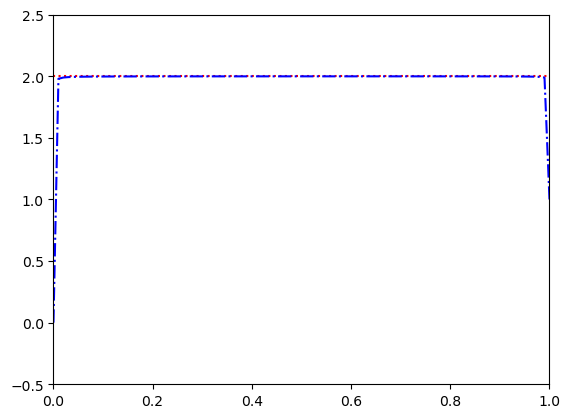

In [8]:
# set up animation plots (this may take a few seconds to run)
def animate(i):
    l.set_data(x, U[:,i])
    m.set_data(x,U_ex[:,i])

fig, ax = plt.subplots()
ax.axis([0,1,-0.5,2.5])
l, = ax.plot([],[],':r')
m, = ax.plot([],[],'-.b')
ani = matplotlib.animation.FuncAnimation(fig, animate, interval=100,frames=Nt_points)

from IPython.display import HTML
HTML(ani.to_jshtml())        

## Diffusion Equation Backward Euler and Neumann Boundary Conditions
Now try solving the diffusion equations with the following conditions using Backward Euler and the matrix method above. The matrix will have to be modified for the zero Neumann boundary conditions. This is taken from Q6 in Worksheet 1.
$$
 \partial_t u(x,t) = \partial _{xx}u(x,t), \quad x \in (0,1)
$$
$$
 \partial_x u(0,t) =0, \quad \partial_x u(1,t) = 0,
$$
$$
 I(x) = x.
$$


In [11]:
'''
This script finds a numerical approximation for the solution to
 the following 1D heat equation with Neumann conditions:
   u_t = u_xx  for  x in (0,1),  t in (0,T),
   u(x,t=0) = x,
   u'(x=0,t) = 0, u'(x=1,t) = 0,
 using a backward Euler scheme.
''' 

# initial condition
def I2(x):
    return x

# exact solution
def U_exact2(x,t):
    M = np.size(x)
    u_ex = 0.5*np.ones(M)  
            
    for s in range(1,1000,2): # use the first 1000 terms (half of which are zero)
        npi= s*np.pi
        c_n = -(4.0)/npi/npi                            
        u_ex = u_ex + c_n*np.cos(npi*x)*np.exp(-1*npi*npi*t)
        
    return u_ex

In [13]:
# Set parameters as before
Nt_gaps = 200    # number of timesteps
T = 1              # final time 
Nt_points = Nt_gaps + 1
t = np.linspace(0.,T,Nt_points)  # times at each time step

Nx_spaces = 100;   # number of spaces in x
L = 1; 
Nx_points = Nx_spaces + 1 
x = np.linspace(0, L, Nx_points)    # mesh points in space

dx = x[1] - x[0] 
dt = t[1] - t[0]

C = dt/(dx**2)
print("Delta x =", dx, "Delta t = ", dt, "C =", C)

# set up structures to hold U and U_ex2 and interim arrays
u     = np.zeros(Nx_points)
u_old = np.zeros(Nx_points)
U     = np.zeros((Nx_points,Nt_points))
U_ex2 = np.zeros((Nx_points,Nt_points))

Delta x = 0.01 Delta t =  0.005 C = 50.0


In [14]:
# Data structures for the linear system
A = np.zeros((Nx_points, Nx_points))
b = np.zeros(Nx_points)

# set up the matrix A
for i in range(1, Nx_points-1): # rows from 1 to Nx-2
    A[i,i-1] = -C
    A[i,i+1] = -C
    A[i,i] = 1 + 2*C

# implement Neumann BC
A[0,0] = 1+2*C
A[0,1]= -2*C 
A[Nx_points-1,Nx_points-1] = 1+2*C 
A[Nx_points-1,Nx_points-2] = -2*C

# Set initial condition u(x,0) = I(x)
u_old = I2(x)

# initialise matrices U and U_ex2 for first time step
U[:,0] = u_old[:]
U_ex2[:,0] = U_exact2(x,0)

#perform time-stepping
for n in range(1, Nt_points): # timestep for 1 to t = T-1 so last step finishes on t=T
    # Compute b and solve linear system
    b[:] = u_old[:]
    u[:] = np.linalg.solve(A,b)
    # Update u_old before next step
    u_old = u
    U[:,n] = u
    U_ex2[:,n]=U_exact2(x,t[n])

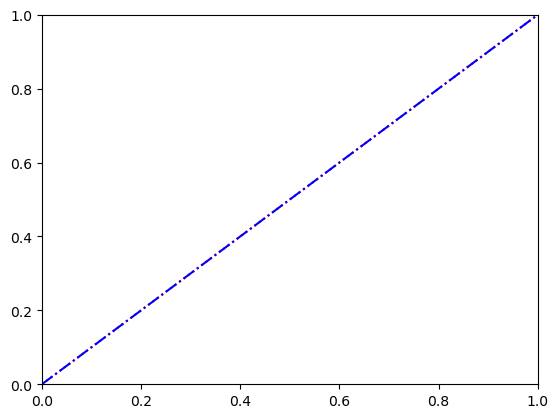

In [15]:
# set up animation plots
fig, ax = plt.subplots()
ax.axis([0,1,0,1])
def animate(i):
    l.set_data(x, U[:,i])
    m.set_data(x, U_ex2[:,i])
    
ax.axis([0,1,0,1.0])
l, = ax.plot([],[],':r')
m, = ax.plot([],[],'-.b')

ani2 = matplotlib.animation.FuncAnimation(fig, animate, frames=Nt_points)

from IPython.display import HTML
HTML(ani2.to_jshtml())